In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

# Change directory
os.chdir('drive/MyDrive/ic3/TII3Q')
os.getcwd()

'/content/drive/MyDrive/ic3/TII3Q'

# Carregar arquivos
Carregue arquivos das medidas neste notebook

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from time import sleep
from IPython.display import clear_output
from datetime import datetime,timedelta
from matplotlib.ticker import FormatStrFormatter
from scipy.signal import find_peaks
from scipy.optimize import curve_fit

In [4]:
def damped_cos(t, offset, amp, tau, period, phase):
    return offset + amp * np.exp(-t / tau) * np.cos(2 * np.pi / period * t + phase)


def exp_decay(t, offset, tau, amp):
    return offset + amp * np.exp(-t / tau)


def fit(Durat, Mag, func, p0):
    # data graph
    #fig = go.Figure(go.Scatter(x=Durat, y=Mag, mode="lines+markers", name="Data"))
    plt.scatter(Durat,Mag,label="Data")
    try:  # atempts to fit the curve
        popt, pcov = curve_fit(
            func,
            Durat,
            Mag,
            p0=p0,
        )

    except Exception as e:
        print("Fit failed")
        print(e)
        empty = [np.nan] * len(func.__code__.co_varnames)
        popt, perr = (empty, empty)
    else:
        perr = np.sqrt(np.diag(pcov))
        t = np.linspace(Durat[0], Durat[-1], len(Durat) * 10)
        y = func(t, *popt)
        plt.plot(t,y,label="Fit",color="red")
        #fig = fig.add_trace(go.Scatter(x=t, y=y, mode="lines", name="Fit"))

    #fig.update_layout(height=600, width=700)
    dic_popt = {name: value for name, value in zip(func.__code__.co_varnames[1:], popt)}
    dic_perr = {name: value for name, value in zip(func.__code__.co_varnames[1:], perr)}

    #return fig, dic_popt, dic_perr
    return dic_popt, dic_perr

In [ ]:
dados = np.load("PowerSweep_Q2TII__2024_10_02__15_14_28.npz")
print(dados)
print(dados["header"].item())
dados["header"]
attenuations = dados["Att"]
Freq = dados["Freq"]
mags = dados["Mag"]
phases = dados["Phase"]
plt.xlabel("Cavity signal frequency (GHz)")
plt.ylabel("Cavity signal attenuation (dB)")
plt.title("VNA Power Sweep Q2 TII")

plt.pcolor(Freq/1e9, attenuations, mags)
plt.colorbar(label="Cavity output power (dBm)")

FileNotFoundError: [Errno 2] No such file or directory: 'PowerSweep_Q2TII__2024_10_02__15_14_28.npz'

In [ ]:
dados = np.load("PowerSweep_Q2TII__2024_10_02__15_14_28.npz")
print(list(dados.keys()))
Att = dados["Att"]
Freq = dados["Freq"]
Mag = dados["Mag"]
phases = dados["Phase"]
plt.xlabel("Cavity signal frequency (GHz)")
plt.ylabel("Cavity output Power (dBm)")
plt.title("VNA Power Sweep Q2 TII")
plt.plot(Freq/1e9,Mag[45],label="50 dB")
plt.plot(Freq/1e9,Mag[5],label="10 dB")
plt.legend()
pks50=find_peaks(-Mag[45],distance=2000)[0][0]
plt.annotate(f"$Res_{{cav}}={Freq[pks50]/1e9:.5f}GHz$",(Freq[pks50]/1e9,Mag[45][pks50]))
pks10=find_peaks(-Mag[5],distance=2000)[0][0]
plt.annotate(f"$Res_{{cav}}={Freq[pks10]/1e9:.5f}GHz$",(Freq[pks10]/1e9,Mag[5][pks10]))

FileNotFoundError: [Errno 2] No such file or directory: 'PowerSweep_Q2TII__2024_10_02__15_14_28.npz'

Text(4.454, -50.5511626766, '$\\omega_{01}=4.4540GHz$')

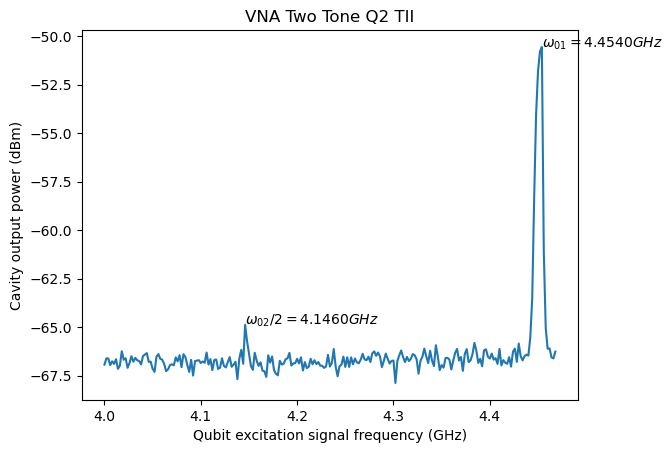

In [ ]:
dados=np.load("TWOTONE_SWEEP_Q2TII__2024_10_03__12_18_42.npz")
list(dados.keys())
Freq=dados["Freq"]
Mag = dados['Mag']
pks=find_peaks(Mag,distance=100)
plt.xlabel("Qubit excitation signal frequency (GHz)")
plt.ylabel("Cavity output power (dBm)")
plt.title("VNA Two Tone Q3 TII")
plt.plot(Freq/1e9, Mag)
plt.annotate(f"$\\omega_{{02}}/2={Freq[pks[0][0]]/1e9:.4f}GHz$",(Freq[pks[0][0]]/1e9,Mag[pks[0][0]]))
plt.annotate(f"$\\omega_{{01}}={Freq[pks[0][1]]/1e9:.4f}GHz$",(Freq[pks[0][1]]/1e9,Mag[pks[0][1]]))

['header', 'Amp', 'Freq', 'Mag', 'Phase']


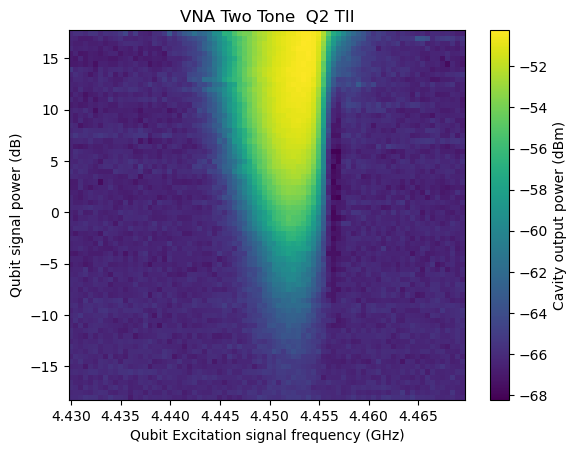

In [ ]:
dados = np.load("TWOTONE_MAP_Q2TII_2024_10_03__10_56_49.npz")
print(list(dados.keys()))
Amp=dados["Amp"]
Freq = dados["Freq"]
mags = dados["Mag"]
phases = dados["Phase"]
plt.xlabel("Qubit Excitation signal frequency (GHz)")
plt.ylabel("Qubit signal power (dB)")
plt.title("VNA Two Tone  Q3 TII")

plt.pcolor(Freq/1e9, Amp, mags)
plt.colorbar(label="Cavity output power (dBm)")

['header', 'Amp', 'Freq', 'Mag', 'Phase']


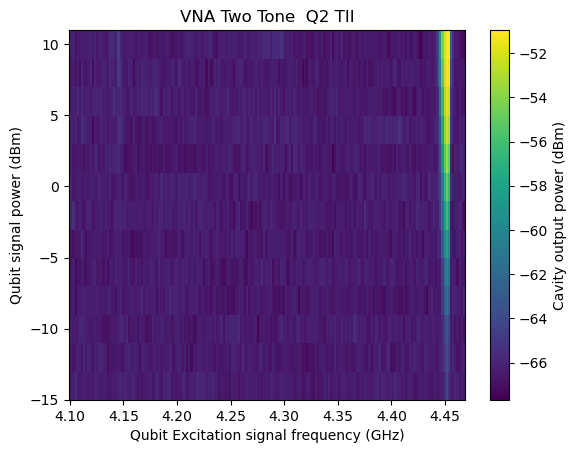

In [ ]:
dados = np.load("TWOTONE_MAP_Q2TII_2024_10_03__12_26_56.npz")
print(list(dados.keys()))
Amp=dados["Amp"]
Freq = dados["Freq"]
mags = dados["Mag"]
phases = dados["Phase"]
plt.xlabel("Qubit Excitation signal frequency (GHz)")
plt.ylabel("Qubit signal power (dBm)")
plt.title("VNA Two Tone  Q3 TII")

plt.pcolor(Freq/1e9, Amp, mags)
plt.colorbar(label="Cavity output power (dBm)")

## PULSADO

['header', 'Mag', 'Phase', 'start', 'end', 'Responsible', 'setup', 'sample', 'name', 'RF', 'attenuation', 'Freq', 'alazar_recordsPerBuffer', 'alazar_buffersPerAcquisition']


Text(7.142100000000009, -119.68269154582131, 'Res=7.1421 GHz')

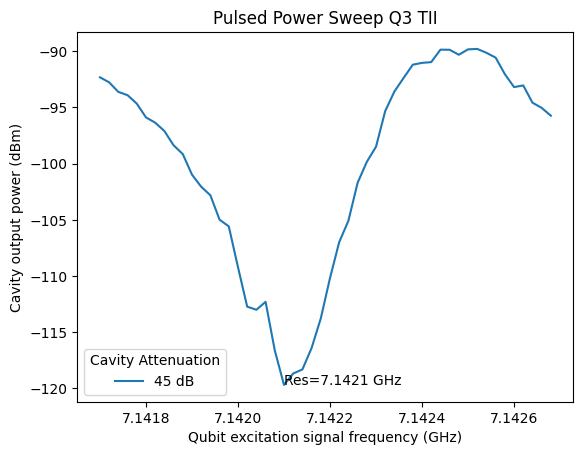

In [ ]:
dados=np.load("Pulsed_Cavity_Q3_TII_2024_11_22__17_31_25.npz")
print(list(dados.keys()))
Freq=dados["Freq"]
Mag = dados['Mag']
Att=dados["attenuation"]
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.4f'))
plt.xlabel("Qubit excitation signal frequency (GHz)")
plt.ylabel("Cavity output power (dBm)")
plt.title("Pulsed Power Sweep Q3 TII")
#for i,att in enumerate(Att):
plt.plot(Freq/1e9, Mag,label=f"{Att} dB")
plt.legend(title="Cavity Attenuation")
plt.annotate(f"Res={Freq[np.argmin(Mag)]/1e9:.4f} GHz",(Freq[np.argmin(Mag)]/1e9,np.min(Mag)),)

Text(5.26470000000001, -97.1376038627711, '$\\omega_{01}=5.2647GHz$')

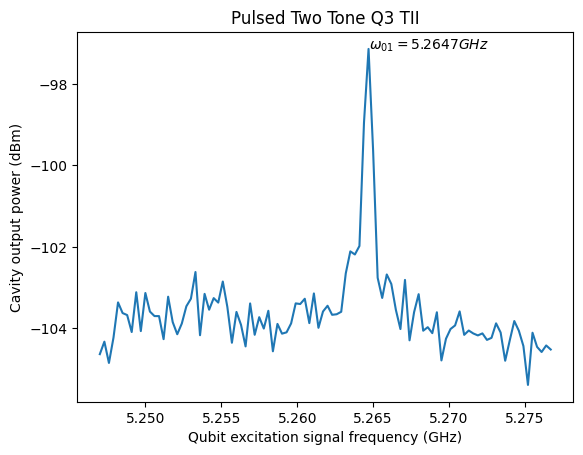

In [ ]:
dados=np.load("Pulsed_TwoTone_Q3_TII_2024_11_22__21_44_56.npz")
list(dados.keys())
Freq=dados["Freq"]
Mag = dados['Mag']
pks=find_peaks(Mag,distance=100)
plt.xlabel("Qubit excitation signal frequency (GHz)")
plt.ylabel("Cavity output power (dBm)")
plt.title("Pulsed Two Tone Q3 TII")
plt.plot(Freq/1e9, Mag)
plt.annotate(f"$\\omega_{{01}}={Freq[pks[0][0]]/1e9:.4f}GHz$",(Freq[pks[0][0]]/1e9,Mag[pks[0][0]]))


Text(8e-17, -95.92602531745564, '$\\pi_{\\text{pulse}}=0.080\\mu s$')

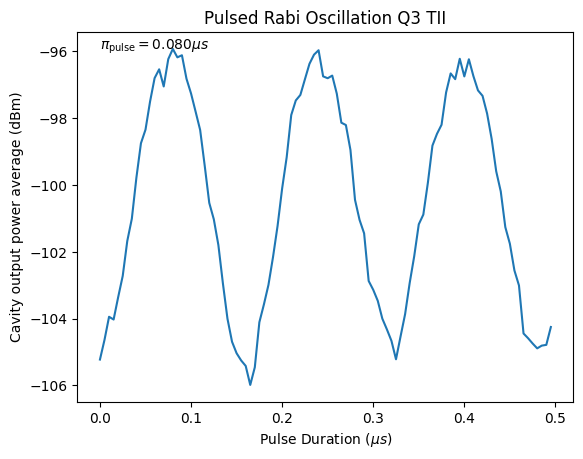

In [ ]:
dados=np.load("Rabi_Q3_TII_2024_11_22__22_40_58.npz")
list(dados.keys())
Durat=dados["Durat"]
Mag = dados['Mag']
pks=find_peaks(Mag,distance=100)
plt.xlabel("Pulse Duration ($\\mu s$)")
plt.ylabel("Cavity output power average (dBm)")
plt.title("Pulsed Rabi Oscillation Q3 TII")
plt.plot(Durat*1e6, Mag)
plt.annotate(f"$\\pi_{{\\text{{pulse}}}}={Durat[pks[0][0]]*1e6:.3f}\\mu s$",(Durat[pks[0][0]]/1e9,Mag[pks[0][0]]))


['header', 'Mag', 'Phase', 'start', 'end', 'Responsible', 'setup', 'sample', 'name', 'attenuation', 'RF', 'measurement_freq', 'measurement_amp', 'freq_qubit', 'pi_pulse_len', 'Delay', 'alazar_recordsPerBuffer', 'alazar_buffersPerAcquisition', 'pulse_type', 'pulse_length', 'pulse_amplitude', 'pulse_sigma_factor', 'pulse_frequency', 'pulse_phase', 'pulse_border_length']


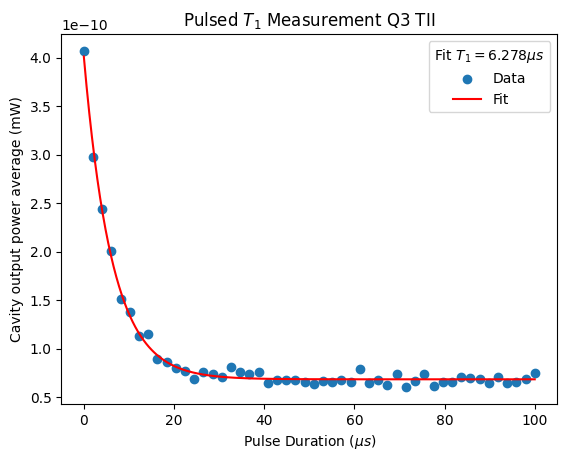

In [ ]:
dados=np.load("T1_Q3_TII_2024_11_23__13_10_34.npz")
print(list(dados.keys()))
Delay=dados["Delay"]
Mag = dados['Mag']
Mag=10**(Mag/10)
plt.xlabel("Pulse Duration ($\\mu s$)")
plt.ylabel("Cavity output power average (mW)")
plt.title("Pulsed $T_1$ Measurement Q3 TII")
popt,perr=fit(Delay*1e6, Mag, exp_decay, [-94,10,5])
plt.legend(title=f"Fit $T_1={popt['tau']:.3f}\\mu s$")



['header', 'Mag', 'Phase', 'start', 'end', 'Responsible', 'setup', 'sample', 'name', 'attenuation', 'RF', 'measurement_freq', 'measurement_amp', 'freq_qubit', 'pi_pulse_len', 'Detuning', 'Delay', 'alazar_recordsPerBuffer', 'alazar_buffersPerAcquisition', 'pulse_type', 'pulse_length', 'pulse_amplitude', 'pulse_sigma_factor', 'pulse_frequency', 'pulse_phase', 'pulse_border_length']


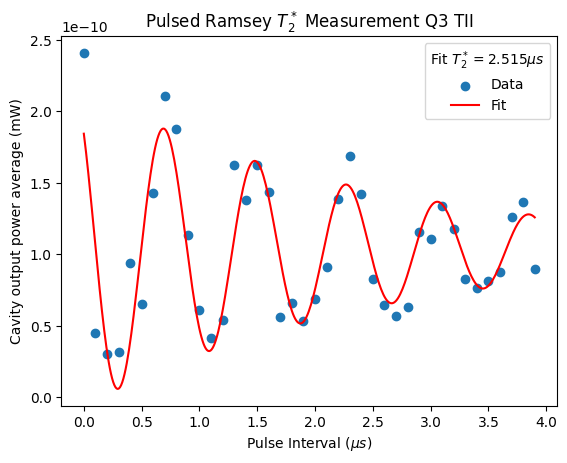

In [ ]:
dados=np.load("T2_Q3_TII_2024_11_22__22_53_28.npz")
print(list(dados.keys()))
Delay=dados["Delay"]
Mag = dados['Mag']
Mag=10**(Mag/10)
plt.xlabel("Pulse Interval ($\\mu s$)")
plt.ylabel("Cavity output power average (mW)")
plt.title("Pulsed Ramsey $T_2^*$ Measurement Q3 TII")
#def damped_cos(t, offset, amp, tau, period, phase):
popt,perr=fit(Delay*1e6, Mag, damped_cos, [10e-6, -1e-6, 1, 0.7 ,0])
plt.legend(title=f"Fit $T_2^*={popt['tau']:.3f}\\mu s$")



['header', 'Mag', 'Phase', 'start', 'end', 'Responsible', 'setup', 'sample', 'name', 'attenuation', 'RF', 'measurement_freq', 'measurement_amp', 'freq_qubit', 'pi_pulse_len', 'Detuning', 'Delay', 'alazar_recordsPerBuffer', 'alazar_buffersPerAcquisition', 'pulse_pi_type', 'pulse_pi_length', 'pulse_pi_amplitude', 'pulse_pi_sigma_factor', 'pulse_pi_frequency', 'pulse_pi_phase', 'pulse_pi_border_length', 'pulse_pio2_type', 'pulse_pio2_length', 'pulse_pio2_amplitude', 'pulse_pio2_sigma_factor', 'pulse_pio2_frequency', 'pulse_pio2_phase', 'pulse_pio2_border_length']


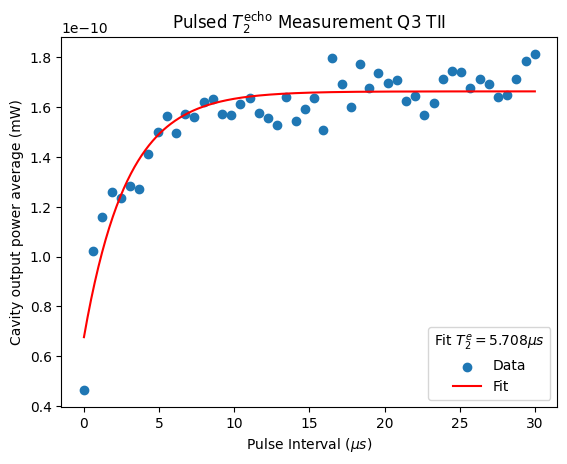

In [5]:
dados=np.load("T2e_Q3_TII__2024_11_23__12_43_21.npz")
print(list(dados.keys()))
Delay=dados["Delay"]
Mag = dados['Mag']
Mag=10**(Mag/10)
plt.xlabel("Pulse Interval ($\\mu s$)")
plt.ylabel("Cavity output power average (mW)")
plt.title("Pulsed $T_2^{{\\text{echo}}}$ Measurement Q3 TII")
popt,perr=fit(Delay*1e6, Mag, exp_decay, [1e-5,2,-1e6])
plt.legend(title=f"Fit $T_2^e={2*popt['tau']:.3f}\\mu s$")



T1_2QTII__2024_10_04__18_39_34.npz


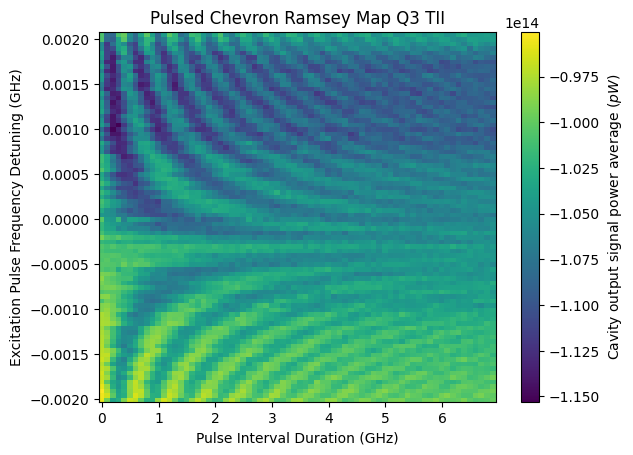

In [ ]:
dados = np.load('ChevronRamsey_Q3_TII_2024_11_22__23_00_18.npz')
Freq=dados["Detuning"]
dados["header"]
Durat = dados['Delay']
Mag = dados['Mag']
#Mag = 10**(Mag/10)
Phase = dados['Phase']
#plt.plot(Durat,Mag[3,:])
plt.pcolor(Durat*1e6,Freq/1e9,Mag*1e12)
plt.xlabel("Pulse Interval Duration (GHz)")
plt.ylabel("Excitation Pulse Frequency Detuning (GHz)")
plt.title("Pulsed Chevron Ramsey Map Q3 TII")

plt.colorbar(label="Cavity output signal power average ($pW$)")
#plt.vlines(0.525e-6,-110,-130)
print('T1_2QTII__2024_10_04__18_39_34.npz')

In [ ]:
list(dados.keys())

['header',
 'Mag',
 'Phase',
 'start',
 'end',
 'Responsible',
 'setup',
 'sample',
 'name',
 'freq_qubit',
 'attenuation',
 'RF',
 'measurement_freq',
 'measurement_amp',
 'pi_pulse_len',
 'Detuning',
 'Delay',
 'alazar_recordsPerBuffer',
 'alazar_buffersPerAcquisition',
 'pulse_type',
 'pulse_length',
 'pulse_amplitude',
 'pulse_sigma_factor',
 'pulse_phase',
 'pulse_border_length']

['header', 'Mag', 'Phase', 'start', 'end', 'Responsible', 'setup', 'sample', 'name', 'attenuation', 'RF', 'measurement_freq', 'measurement_amp', 'freq_qubit', 'pi_pulse_len', 'Freq', 'alazar_recordsPerBuffer', 'alazar_buffersPerAcquisition', 'pulse_type', 'pulse_length', 'pulse_amplitude', 'pulse_sigma_factor', 'pulse_frequency', 'pulse_phase', 'pulse_border_length']


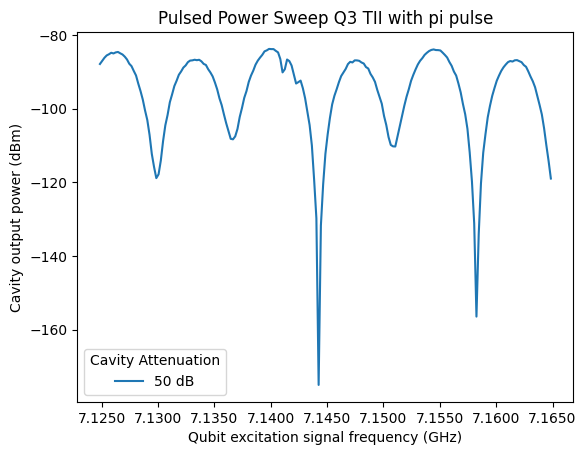

In [ ]:
dados = np.load('Cavity_ExctQubit_Q3_TII_2024_11_23__13_57_26.npz')
print(list(dados.keys()))
Freq=dados["Freq"]
Mag = dados['Mag']
Att=dados["attenuation"]
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.4f'))
plt.xlabel("Qubit excitation signal frequency (GHz)")
plt.ylabel("Cavity output power (dBm)")
plt.title("Pulsed Power Sweep Q3 TII with pi pulse")
#for i,att in enumerate(Att):
plt.plot(Freq/1e9, Mag,label=f"{Att} dB")
plt.legend(title="Cavity Attenuation")
#plt.annotate(f"Res={Freq[np.argmin(Mag)]/1e9:.4f} GHz",(Freq[np.argmin(Mag)]/1e9,np.min(Mag)),)

['header', 'Mag', 'Phase', 'start', 'end', 'Responsible', 'setup', 'sample', 'name', 'attenuation', 'RF', 'measurement_freq', 'measurement_amp', 'freq_qubit', 'pi_pulse_len', 'Freq', 'alazar_recordsPerBuffer', 'alazar_buffersPerAcquisition', 'pulse_type', 'pulse_length', 'pulse_amplitude', 'pulse_sigma_factor', 'pulse_frequency', 'pulse_phase', 'pulse_border_length']


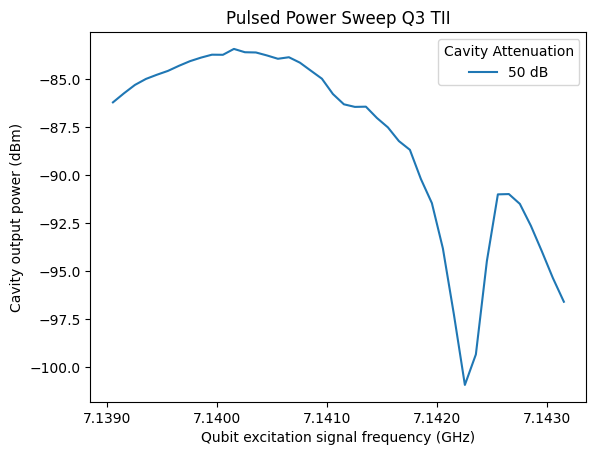

In [ ]:

dados = np.load('Cavity_ExctQubit_Q3_TII_2024_11_23__14_10_45.npz')
print(list(dados.keys()))
Freq=dados["Freq"]
Mag = dados['Mag']
Att=dados["attenuation"]
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.4f'))
plt.xlabel("Qubit excitation signal frequency (GHz)")
plt.ylabel("Cavity output power (dBm)")
plt.title("Pulsed Power Sweep Q3 TII")
#for i,att in enumerate(Att):
plt.plot(Freq/1e9, Mag,label=f"{Att} dB")
plt.legend(title="Cavity Attenuation")
#plt.annotate(f"Res={Freq[np.argmin(Mag)]/1e9:.4f} GHz",(Freq[np.argmin(Mag)]/1e9,np.min(Mag)),)


['header', 'Mag', 'Phase', 'start', 'end', 'Responsible', 'setup', 'sample', 'name', 'attenuation', 'RF', 'measurement_freq', 'measurement_amp', 'freq_qubit', 'pi_pulse_len', 'Freq', 'alazar_recordsPerBuffer', 'alazar_buffersPerAcquisition', 'pulse_type', 'pulse_length', 'pulse_amplitude', 'pulse_sigma_factor', 'pulse_frequency', 'pulse_phase', 'pulse_border_length']


Text(7.141150000000008, -90.48027231038859, 'Res=7.1412 GHz')

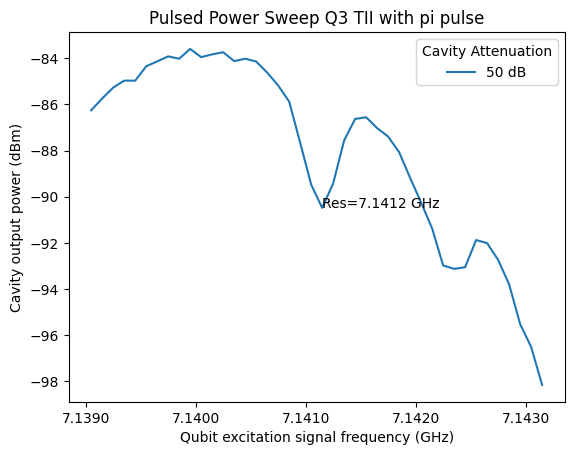

In [ ]:

dados = np.load('Cavity_ExctQubit_Q3_TII_2024_11_23__14_07_43.npz')
print(list(dados.keys()))
Freq=dados["Freq"]
Mag = dados['Mag']
Att=dados["attenuation"]
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.4f'))
plt.xlabel("Qubit excitation signal frequency (GHz)")
plt.ylabel("Cavity output power (dBm)")
plt.title("Pulsed Power Sweep Q3 TII with pi pulse")
#for i,att in enumerate(Att):
plt.plot(Freq/1e9, Mag,label=f"{Att} dB")
plt.legend(title="Cavity Attenuation")
plt.annotate(f"Res={Freq[np.argmin(Mag[:30])]/1e9:.4f} GHz",(Freq[np.argmin(Mag[:30])]/1e9,np.min(Mag[:30])),)